In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# Load the Dataset
# Replace 'cruise_data.csv' with your actual file name
df = pd.read_csv('Q3 Data - Cruise_ship_data.csv')

In [ ]:
# Initial Exploration
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Overview:
     Ship_name Cruise_line  Age  Tonnage  passengers  length  cabins  \
0      Journey     Azamara    6   30.277        6.94    5.94    3.55   
1        Quest     Azamara    6   30.277        6.94    5.94    3.55   
2  Celebration    Carnival   26   47.262       14.86    7.22    7.43   
3     Conquest    Carnival   11  110.000       29.74    9.53   14.88   
4      Destiny    Carnival   17  101.353       26.42    8.92   13.21   

   passenger_density   crew  
0              42.64   3.55  
1              42.64   3.55  
2              31.80   6.70  
3              36.99  19.10  
4              38.36  10.00  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonna

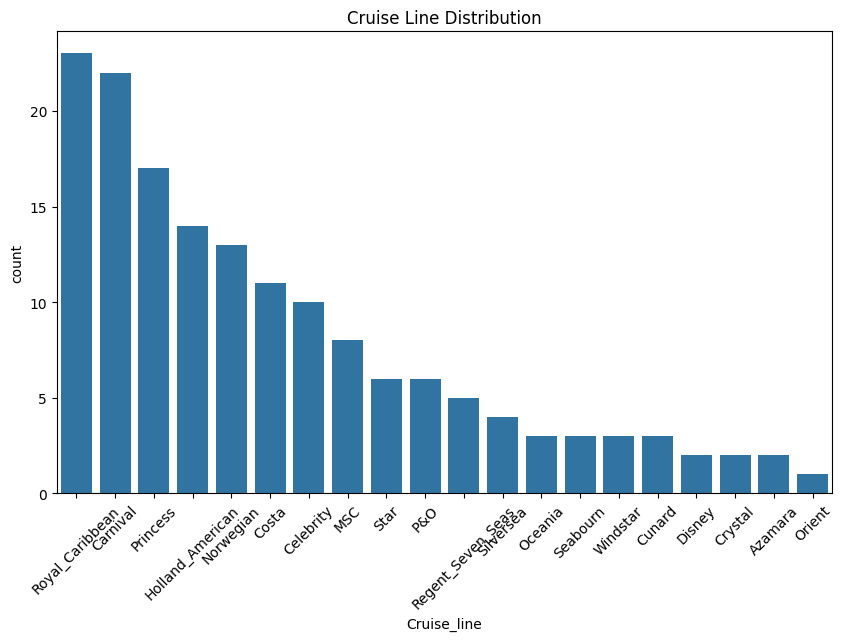

In [ ]:
# Count plot for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cruise_line', order=df['Cruise_line'].value_counts().index)
plt.title('Cruise Line Distribution')
plt.xticks(rotation=45)
plt.show()

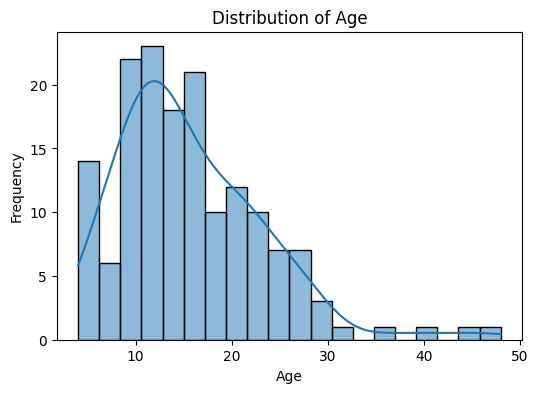

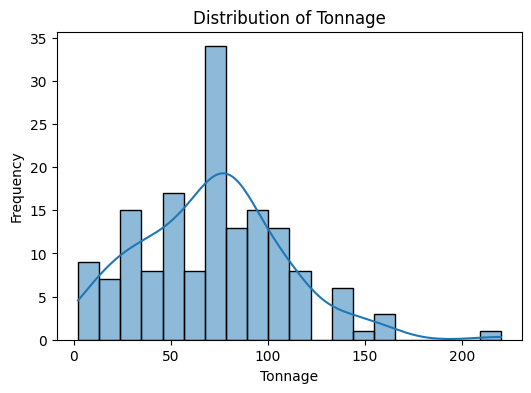

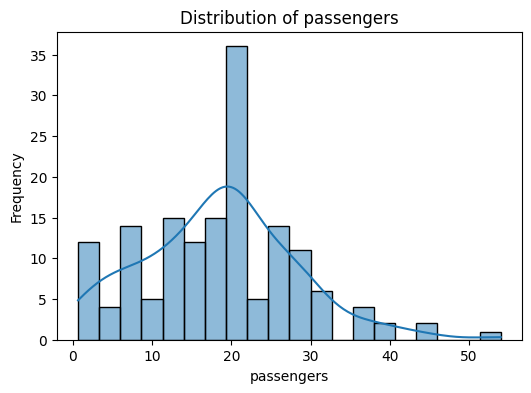

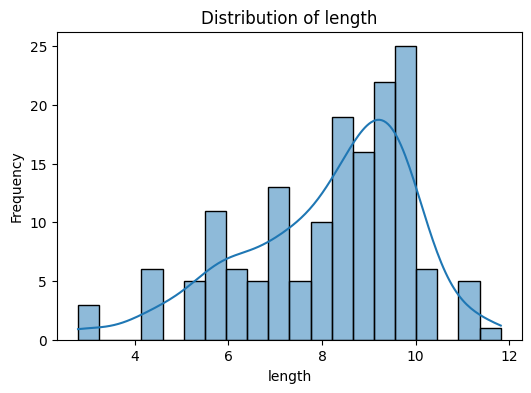

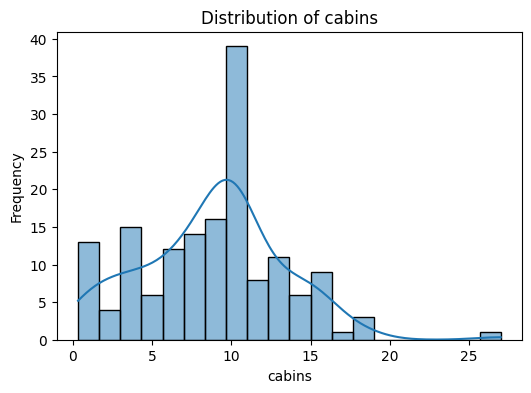

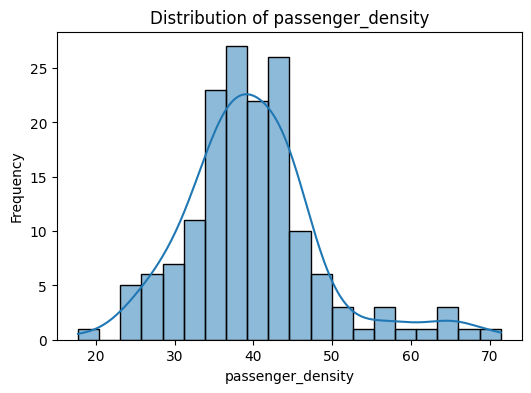

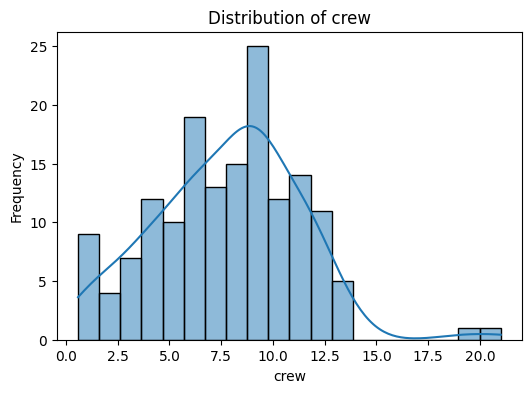

In [ ]:
## Univariate Analysis
# Distribution of numerical features
num_features = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

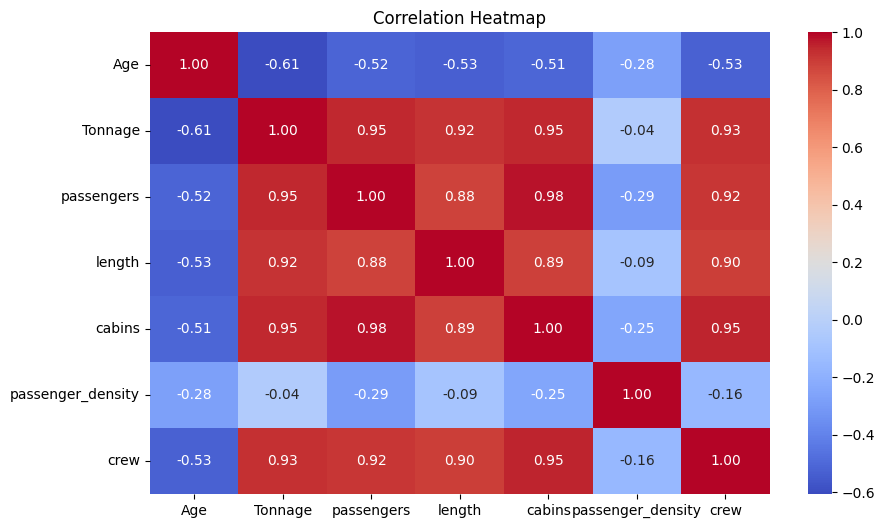

In [10]:
## Bivariate Analysis
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

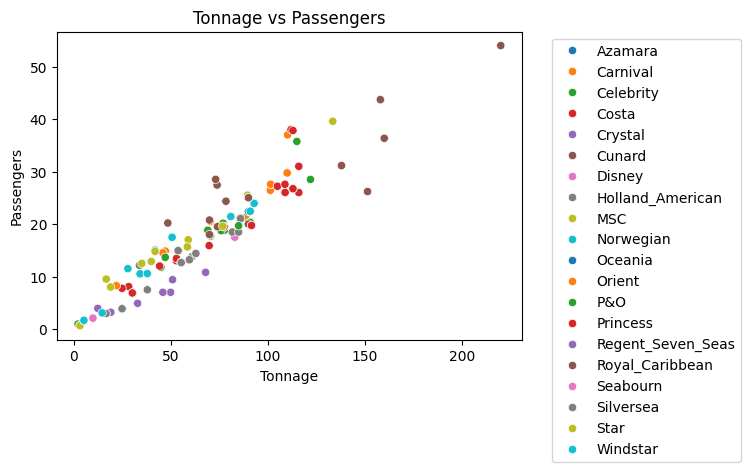

In [12]:
# Scatter plot: Tonnage vs Passengers
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Tonnage', y='passengers', hue='Cruise_line', palette='tab10')
plt.title('Tonnage vs Passengers')
plt.xlabel('Tonnage')
plt.ylabel('Passengers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

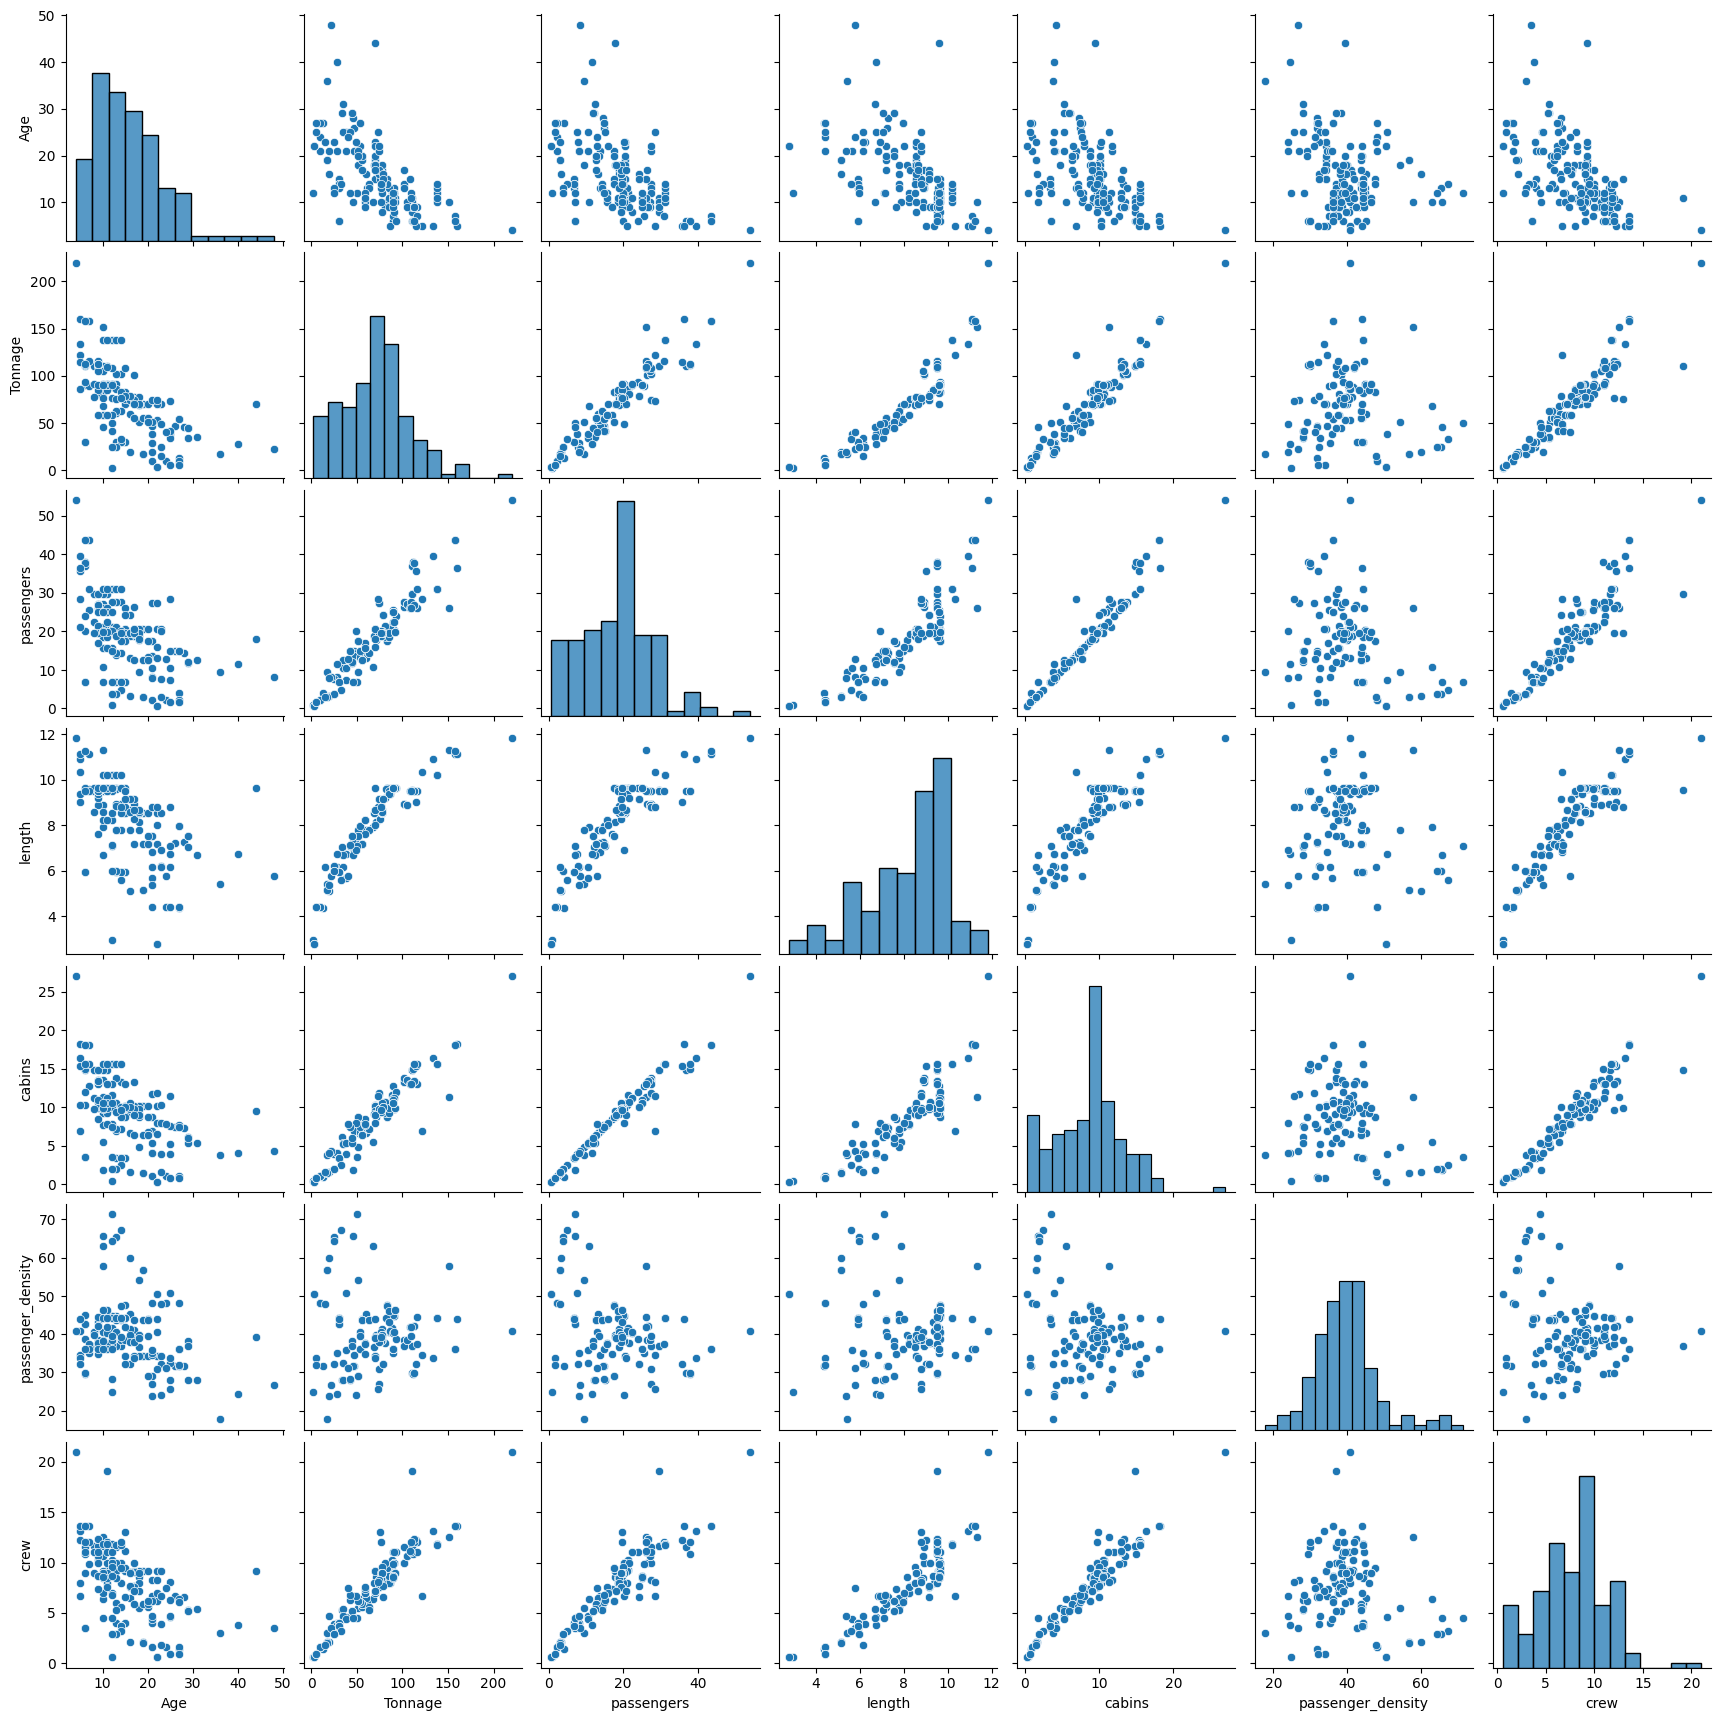

In [13]:
# Pairplot to explore relationships
sns.pairplot(df[num_features])
plt.show()

In [15]:
# Key Metrics
print("\nAverage Passenger Density:")
print(df['passenger_density'].mean())


Average Passenger Density:
39.90094936708861


In [18]:
luxury_ships = df.sort_values(by='passenger_density', ascending=False).head(10)
print("Top 10 Luxury Ships (by Passenger Density):")
print(luxury_ships[['Ship_name', 'Cruise_line', 'passenger_density']])

Top 10 Luxury Ships (by Passenger Density):
       Ship_name        Cruise_line  passenger_density
115      Mariner  Regent_Seven_Seas              71.43
116    Navigator  Regent_Seven_Seas              67.35
118      Voyager  Regent_Seven_Seas              65.71
146       Shadow          Silversea              65.45
147      Whisper          Silversea              64.43
45      Serenity            Crystal              62.96
117  PaulGauguin  Regent_Seven_Seas              60.00
48    QueenMary2             Cunard              57.79
148         Wind          Silversea              56.76
145        Cloud          Silversea              56.76


In [19]:
df['Crew_to_Passenger'] = df['crew'] / df['passengers']
crew_ratios = df.groupby('Cruise_line')['Crew_to_Passenger'].mean().sort_values(ascending=False)
print("Average Crew-to-Passenger Ratios by Cruise Line:")
print(crew_ratios)


Average Crew-to-Passenger Ratios by Cruise Line:
Cruise_line
Seabourn             0.769231
Silversea            0.721736
Star                 0.671639
Regent_Seven_Seas    0.593089
Oceania              0.584795
Crystal              0.584338
Windstar             0.556108
Disney               0.540000
Azamara              0.511527
Cunard               0.480827
Celebrity            0.477910
Princess             0.446693
Holland_American     0.446010
Norwegian            0.443657
Carnival             0.437165
Costa                0.425184
P&O                  0.424373
Orient               0.423729
MSC                  0.409376
Royal_Caribbean      0.347185
Name: Crew_to_Passenger, dtype: float64


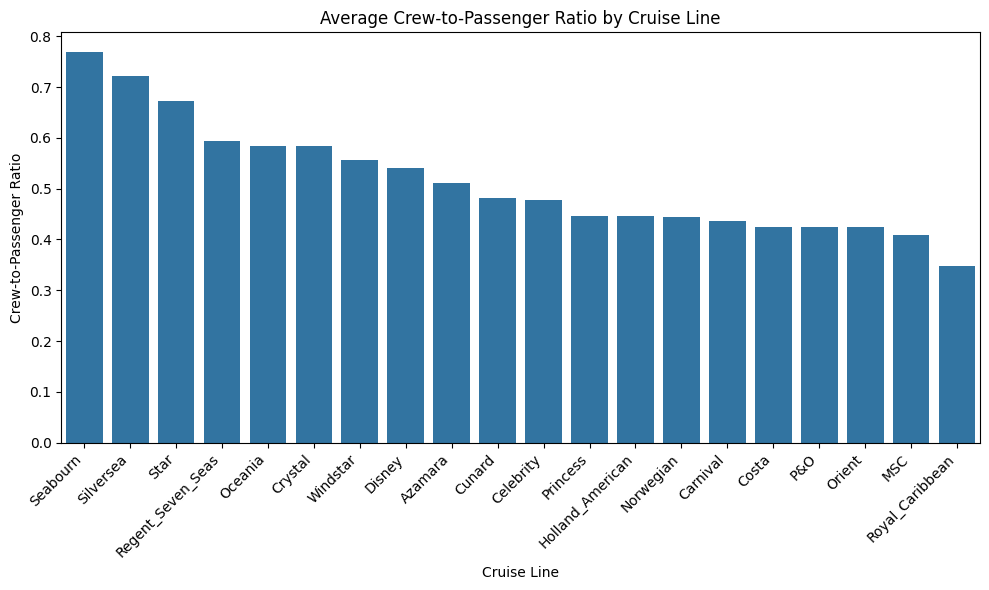

In [20]:
# Plotting the crew-to-passenger ratios
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=crew_ratios.index, y=crew_ratios.values)
plt.title('Average Crew-to-Passenger Ratio by Cruise Line')
plt.xlabel('Cruise Line')
plt.ylabel('Crew-to-Passenger Ratio')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [21]:
small_ships = df[df['Tonnage'] < df['Tonnage'].median()]
large_ships = df[df['Tonnage'] >= df['Tonnage'].median()]

print(f"Small Ships Count: {len(small_ships)}, Large Ships Count: {len(large_ships)}")


Small Ships Count: 79, Large Ships Count: 79


In [24]:
luxury_ranking = df.groupby('Cruise_line').agg({
    'passenger_density': 'mean',
    'Crew_to_Passenger': 'mean',
    'Age': 'mean'
}).sort_values(by=['passenger_density', 'Crew_to_Passenger'], ascending=[True, False])

print("Luxury Cruise Line Rankings:")
print(luxury_ranking)

Luxury Cruise Line Rankings:
                   passenger_density  Crew_to_Passenger        Age
Cruise_line                                                       
Orient                     26.730000           0.423729  48.000000
MSC                        32.745000           0.409376  15.125000
Norwegian                  34.753846           0.443657  17.461538
Carnival                   36.045909           0.437165  15.227273
Royal_Caribbean            36.672609           0.347185  13.652174
Star                       37.298333           0.671639  19.166667
Costa                      37.311818           0.425184  16.181818
Windstar                   37.923333           0.556108  25.000000
P&O                        38.175000           0.424373  14.000000
Celebrity                  39.534000           0.477910  13.700000
Princess                   41.220000           0.446693  12.941176
Azamara                    42.640000           0.511527   6.000000
Holland_American           42.715

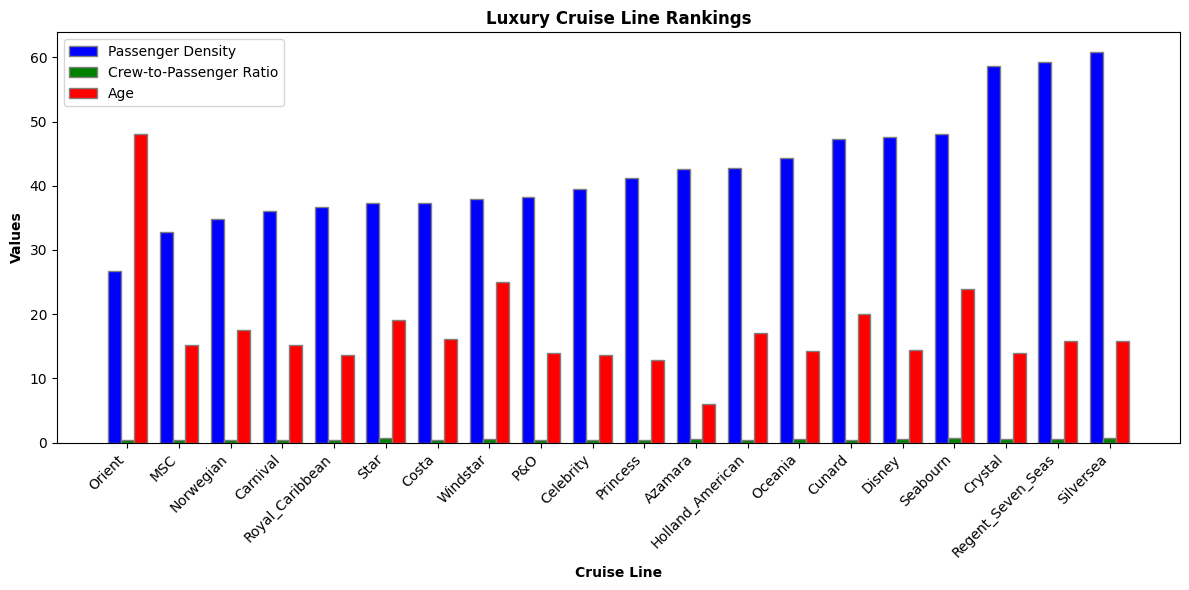

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'luxury_ranking' DataFrame from previous code

# Set up the plot
plt.figure(figsize=(12, 6))

# Get the cruise lines (index of the DataFrame)
cruise_lines = luxury_ranking.index

# Get the width of each bar group
bar_width = 0.25

# Set the positions for the bars
r1 = range(len(cruise_lines))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plots
plt.bar(r1, luxury_ranking['passenger_density'], color='b', width=bar_width, edgecolor='grey', label='Passenger Density')
plt.bar(r2, luxury_ranking['Crew_to_Passenger'], color='g', width=bar_width, edgecolor='grey', label='Crew-to-Passenger Ratio')
plt.bar(r3, luxury_ranking['Age'], color='r', width=bar_width, edgecolor='grey', label='Age')

# Add labels and title
plt.xlabel('Cruise Line', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(cruise_lines))], cruise_lines, rotation=45, ha='right')
plt.ylabel('Values', fontweight='bold')
plt.title('Luxury Cruise Line Rankings', fontweight='bold')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
df['Tonnage_to_Passenger'] = df['Tonnage'] / df['passengers']
eco_ships = df[df['Age'] < 10].sort_values(by='Tonnage_to_Passenger', ascending=False)

print("Top Eco-Friendly Luxury Ships:")
print(eco_ships[['Ship_name', 'Cruise_line', 'Age', 'Tonnage_to_Passenger']])


Top Eco-Friendly Luxury Ships:
          Ship_name       Cruise_line  Age  Tonnage_to_Passenger
49    QueenVictoria            Cunard    6              4.500000
97        Caribbean          Princess    9              4.461538
126    Independence   Royal_Caribbean    5              4.402862
0           Journey           Azamara    6              4.362680
1             Quest           Azamara    6              4.362680
91          Arcadia               P&O    9              4.319106
30         Solstice         Celebrity    5              4.280702
109         Saphire          Princess    9              4.225879
101         Diamond          Princess    9              4.225879
16          Miracle          Carnival    9              4.166667
53          Eurodam  Holland_American    5              4.087452
134           Oasis   Royal_Caribbean    4              4.074074
78            Jewel         Norwegian    8              4.055258
110             Sea          Princess    8              3.9

In [27]:
df['Cabin_to_Passenger'] = df['cabins'] / df['passengers']
top_cabin_ships = df.sort_values(by='Cabin_to_Passenger', ascending=False).head(10)

print("Ships with Highest Cabin-to-Passenger Ratios:")
print(top_cabin_ships[['Ship_name', 'Cruise_line', 'Cabin_to_Passenger']])


Ships with Highest Cabin-to-Passenger Ratios:
            Ship_name       Cruise_line  Cabin_to_Passenger
152            Pisces              Star            0.602953
18              Pride          Carnival            0.547081
100              Dawn          Princess            0.538462
47   QueenElizabethII            Cunard            0.530430
57         Prinsendam  Holland_American            0.528705
90          MarcoPolo            Orient            0.514528
49      QueenVictoria            Cunard            0.514500
37             Europa             Costa            0.513387
0             Journey           Azamara            0.511527
1               Quest           Azamara            0.511527


In [29]:
long_ships = df.sort_values(by='length', ascending=False).head(10)
print("Longest Ships with High Crew Counts:")
print(long_ships[['Ship_name', 'length', 'crew']])

Longest Ships with High Crew Counts:
        Ship_name  length   crew
134         Oasis   11.82  21.00
48     QueenMary2   11.32  12.53
129       Liberty   11.25  13.60
124       Freedom   11.12  13.60
126  Independence   11.12  13.60
67       Fantasia   10.93  13.13
30       Solstice   10.33   6.70
123      Explorer   10.20  11.76
141       Voyager   10.20  11.76
119     Adventure   10.20  11.85


In [30]:
classic_ships = df[(df['Age'] > 20) & (df['passenger_density'] < df['passenger_density'].median())]
print("Classic Luxury Ships:")
print(classic_ships[['Ship_name', 'Cruise_line', 'Age', 'passenger_density']])


Classic Luxury Ships:
       Ship_name        Cruise_line  Age  passenger_density
2    Celebration           Carnival   26              31.80
5        Ecstasy           Carnival   22              34.29
7        Fantasy           Carnival   23              34.23
11       Holiday           Carnival   28              31.72
33        Zenith          Celebrity   21              34.57
34       Allegra              Costa   21              35.19
37        Europa              Costa   27              36.06
40        Marina              Costa   23              32.22
55       Noordam   Holland_American   29              27.94
63     Westerdam   Holland_American   27              36.06
69        Melody                MSC   31              28.11
72      Rhapsody                MSC   36              17.70
74         Crown          Norwegian   25              32.56
76         Dream          Norwegian   21              29.04
79       Majesty          Norwegian   21              35.98
82           Sea  